## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1. Data from our lives	
2. Data manipulation/Exploratory Data Analysis
3. Multipe regression Analysis

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. **Add as many cells as you need**, for easy readability comment when possible.
Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Submission: Send in both a ipynb and a pdf file of your work. 

Good luck!


## 1. Data from our Lives

### Describe a situation or problem from your job, everyday life, current events, etc., for which a regression model would be appropriate. List some (up to 5) predictors that you might use.

**your answer should go here**



Employee's salary can depend on multiple factors, and a regression model can help understand the relationship between these predictors and an employee's salary.

This are the five predictors that are useful in a regression model to predict employee's salary

Predictor 1: Years of experience.
It is one of the important factor for predicting the employee salary, How many years of real-time experience that the person have will leads to high salary, as experience person will have more real-time experience and skill on the work.

Predictor 2: level of Education. 
High level of  education degrees may lead to higher salaries like the ph.d student or  can get high salary than a undergraduation student, By considering both the level of education and the field of study.

Predictor 3: Location.
The cost of living and taxes varies by different locations. Salaries in areas like california will tend to increase higher for increased living expenses(cost of living) and high taxes. so, person in california will get high salary than person in Texas, so the location is important predictor in the employee salary.

Predictor 4: Job role or position.
Different roles will have  different salary within the same organization.For example, Data scienist will earns more than a data analyst.

Predictor 5: Industry or sector of employment.
The industry or sector in which the employee works can have impact on salary. For example, salaries in the technology sector might be higher than those in finance. 

## The data

**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

In [17]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [18]:
#Read in data
df =pd.read_csv("/Users/nuthanreddyvaddireddy/Downloads/auto_imports1.csv")

df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


Loading the csv file consists of the data using pandas library and displaying the top five  rows of the dataset 

## 2. Data 

## 2.1 Munging

Check what types of variables do you have in your data? Do you see anything that doesn't make sense? *Hint: horse power is  an object ?!*

In [19]:
##your code here
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         201 non-null    object 
 11  stroke       201 non-null    object 
 12  comprassion  201 non-null    float64
 13  horse_power  201 non-null    object 
 14  peak_rpm     201 non-null    object 
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(5), int64(5), object(8)
memory usage: 2

By using the info() we get the datatypes and number of non-null count of each column.
In the above data we can see there are 5float64,5int64 and 8object datatypes out of 18 columns.
In the data body,engine_type,cylinders,bore,stroke,horse_power and peak_rpm columns has numerical data but the datatype is shown as object. 
In the data there is no null values in each column.

### Replace '?' with None

### Change the variables: bore, stroke, horse_power, peak_rpm to float64

In [20]:
## Your code her
df.replace("?",None,inplace=True)

converted_columns=['bore','stroke','horse_power','peak_rpm']

df[converted_columns] = df[converted_columns].astype(float)


Replace the ? values with none values by using df.replace in the original dataframe.
converting the columns bore,store,horse_power and peak_rpm datatypes into float datatypes by using the astype(float) function.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  comprassion  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

After replacing "?" with  None values and converting the columns bore,store,horse_power and peak_rpm datatypes into float datatypes.
In the above data we can see there are 9float64,5int64 and 4object datatypes out of 18 columns.
The columns fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,
cylinders,engine_size,comprassion,city_mpg,highway_mpg and price have no null values.
The columns horse_power and peak_rpm have 2 null values.
The columns bore and stroke have 4 null values.

### Drop body,engine_type,cylinders columns and name the new dataframe df2

In [22]:
## Your code here
df2 = df.drop(['body', 'engine_type', 'cylinders'], axis=1)


Droping the columns the body,engine_type and cylinders from the data by using df.drop funtion and loading the new data into new dataframe df2.

In [23]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


By using df2.head() we get the top five rows of the data frame. 

### Drop all nan values

In [24]:
## your code goes here
df2.dropna(inplace=True)
print(df2)


    fuel_type  wheel_base  length  width  heights  curb_weight  engine_size  \
0         gas        88.6   168.8   64.1     48.8         2548          130   
1         gas        88.6   168.8   64.1     48.8         2548          130   
2         gas        94.5   171.2   65.5     52.4         2823          152   
3         gas        99.8   176.6   66.2     54.3         2337          109   
4         gas        99.4   176.6   66.4     54.3         2824          136   
..        ...         ...     ...    ...      ...          ...          ...   
196       gas       109.1   188.8   68.9     55.5         2952          141   
197       gas       109.1   188.8   68.8     55.5         3049          141   
198       gas       109.1   188.8   68.9     55.5         3012          173   
199    diesel       109.1   188.8   68.9     55.5         3217          145   
200       gas       109.1   188.8   68.9     55.5         3062          141   

     bore  stroke  comprassion  horse_power  peak_r

In [25]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

By using isnull().sum() we get count of null values in each column, In the above data the sum of null values in each  column is zero.

### Get dummy variables for fuel_type within df2 drop first level

In [26]:
df2 = pd.get_dummies(df2, columns=['fuel_type'], drop_first=True)
df2

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845,1
197,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045,1
198,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485,1
199,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470,0


converting the categorical variables into binary (0 or 1) columns.
columns=['fuel_type'] This specifies the column in the DataFrame df2 in the original dataframe.


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    float64
 10  peak_rpm       195 non-null    float64
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    uint8  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 23.0 KB


By using the info() we get the datatypes and number of non-null count of each column.
In the above data we can see there are 9float64,5int64 and 1 object datatypes out of 15 columns.
All the columns in the data will have no null values. 

## 2.2 EDA on df2

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

Suggested Steps in EDA:

    Provide descriptions of your sample and features
    Check for missing data
    Identify the shape of your data
    Identify significant correlations
    Spot/deal with outliers in the dataset

These steps are a guidline. Try different things and share your insights about the dataset (**df2**).

Don't forget to add "markdown" cells to include your findings or to explain what you are doing


In [28]:
## Your EDA should start here
df2.shape


(195, 15)

Finding the shape of the data by using df2.shape, In the above data shape is (195,15)
195-rows
15-columns

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    float64
 10  peak_rpm       195 non-null    float64
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    uint8  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 23.0 KB


In the above data we can see there 195-rows and 15-columns, In which there are 9-float64,5-int64 and 1-uint8 datatypes.
The number of non-null values in each column is zero.

In [30]:
df2.describe()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385,0.897436
std,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093,0.304170
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000
25%,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000,1.000000
50%,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000,1.000000
75%,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000,1.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000


df2.describe() command used for to find mean count standard deviation,min,max,count and quartlies of the data.

In [31]:
df2.isnull().sum()

wheel_base       0
length           0
width            0
heights          0
curb_weight      0
engine_size      0
bore             0
stroke           0
comprassion      0
horse_power      0
peak_rpm         0
city_mpg         0
highway_mpg      0
price            0
fuel_type_gas    0
dtype: int64

By using isnull().sum() we get the sum all null in each column, In the data the sum of all null values in each column is zero.

In [32]:
df2.drop_duplicates()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845,1
197,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045,1
198,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485,1
199,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470,0


By using df2.drop_duplicates() we drop the duplicate values from the dataframe.we are going to remove the duplicates in the dataset so that the storage will not get wasted and it would be very much useful to store other data in place of duplicate data.

In [33]:
df.nunique() 

fuel_type        2
body             5
wheel_base      52
length          73
width           43
heights         49
curb_weight    169
engine_type      6
cylinders        7
engine_size     43
bore            38
stroke          36
comprassion     32
horse_power     58
peak_rpm        22
city_mpg        29
highway_mpg     30
price          186
dtype: int64

df.nunique() method is used to find the number of unique values in the column.

In [34]:
df2.value_counts("fuel_type_gas")

fuel_type_gas
1    175
0     20
dtype: int64

1-175 and 0-20
In the above data we can see the dataset value count of each class is not same, so the dataset is not balanced and it varies excessively and it is not good for prediction.


<Axes: xlabel='fuel_type_gas', ylabel='count'>

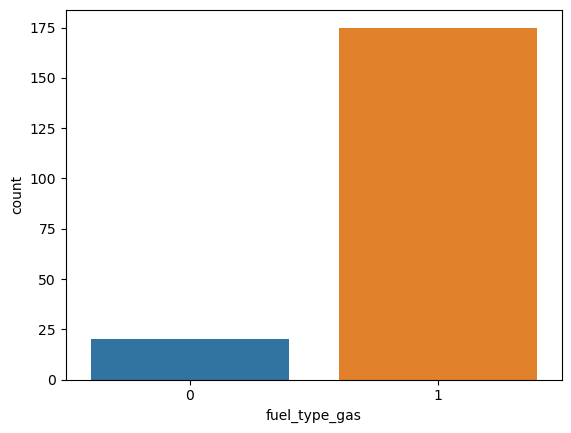

In [35]:
sns.countplot(x="fuel_type_gas", data=df2, )

By sns.countplot(x="fuel_type", data=df2, ) we get the count plot for the values in the fuel_type column. 
1-175 values
0-20 values

<Axes: xlabel='fuel_type_gas', ylabel='wheel_base'>

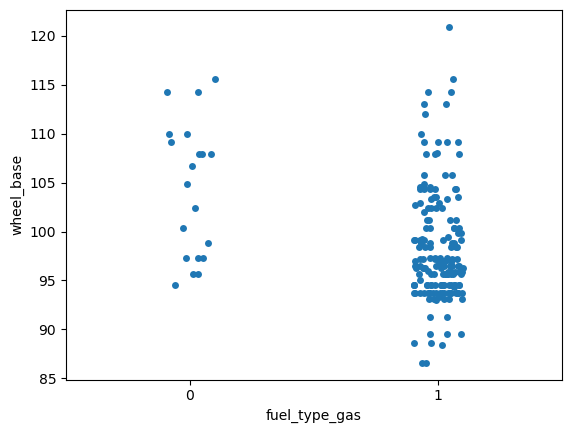

In [36]:
sns.stripplot(y='wheel_base',x='fuel_type_gas',data=df2)

The stripplot is used specify that wheel_base is on the y-axis and fuel-type is on the x-axis.
In The above stripplot we can see observe that the gas(1) has the highest wheel_base with above 120 and the diesel(1) has the low wheel_base lies above 115 .
gas(1) data mostly lies between 90 to 105 wheel_base.

<Axes: xlabel='fuel_type_gas', ylabel='length'>

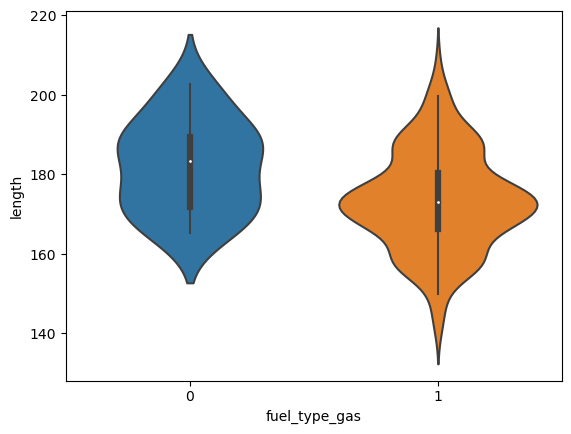

In [37]:
sns.violinplot(x="fuel_type_gas", y="length", data=df2, size=8)

The violinplot is used specify that length is on the y-axis and fuel-type is on the x-axis.
In The above stripplot we can see observe that the gas(1) has the highest length with 210 and the diesel(0) has the low length lies above 200 .
gas(1) data mostly lies between 160 to 190 length.

In [ ]:
sns.pairplot(df2,diag_kind="kde")

In [ ]:
import plotly.express as pt
SCD=pt.scatter_3d(x=df2['wheel_base'],y=df2['length'],z=df2['width'], title='3d scatter plot')
SCD.show()

In [ ]:
SCD=pt.scatter_3d(x=df2['heights'],y=df2['curb_weight'],z=df2['engine_size'], title='3d scatter plot')
SCD.show()

In [ ]:
SCD=pt.scatter_3d(x=df2['bore'],y=df2['stroke'],z=df2['comprassion'], title='3d scatter plot')
SCD.show()

In [ ]:
SCD=pt.scatter_3d(x=df2['horse_power'],y=df2['peak_rpm'],z=df2['city_mpg'], title='3d scatter plot')
SCD.show()

In [ ]:
SCD=pt.scatter_3d(x=df2['highway_mpg'],y=df2['price'],z=df2['wheel_base'], title='3d scatter plot')
SCD.show()

In [ ]:
df2.corr(method="pearson")


In [ ]:
correlation = df2.corr()
sns.set(style='white') 
plt.figure(figsize=(10, 6))  
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation')
plt.show()

wheel_base and length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,
horse_power,price has positive Correlation.
wheel_base and peak_rpm,city_mpg,highway_mpg has negative correlation.

length and wheel_base,width,heights,curb_weight,engine_size,bore,stroke,comprassion,
horse_power,price has positive Correlation.
length and peak_rpm,city_mpg,highway_mpg has negative correlation.

width and wheel_base,length,heights,curb_weight,engine_size,bore,stroke,comprassion,
horse_power,price has positive Correlation.
width and peak_rpm,city_mpg,highway_mpg has negative correlation.

Height and stroke,peak_rpm,city_mpg,highway_mpg,horse_power has negative correlation.
Height and length,width,heights,curb_weight,engine_size,bore,comprassion,price has positive Correlation.

curb_weight and length,width,heights,wheel_base,engine_size,bore,stroke,comprassion,
horse_power,price has positive Correlation.
curb_weight and peak_rpm,city_mpg,highway_mpg has negative correlation.

engine_size and length,width,heights,curb_weight,wheel_base,bore,stroke,comprassion,
horse_power,price has positive Correlation.
engine_size and peak_rpm,city_mpg,highway_mpg has negative correlation.

bore and length,width,heights,curb_weight,wheel_base,engine_size,comprassion,
horse_power,price has positive Correlation.
bore and peak_rpm,city_mpg,highway_mpg,stroke has negative correlation.

stroke and length,width,curb_weight,wheel_base,engine_size,comprassion,
horse_power,price has positive Correlation.
bore and peak_rpm,city_mpg,highway_mpg,bore,heights has negative correlation.

comprassion and length,width,curb_weight,wheel_base,engine_size,stroke,city_mpg,
highway_mpg,bore,heights,price has positive Correlation.
bore and peak_rpm,horse_power has negative correlation.

horse_power and length,width,curb_weight,wheel_base,engine_size,stroke,
,bore,price has positive Correlation.
horse_power and city_mpg,highway_mpg,comprassion,heights has negative correlation.

peak_rpm and horse_power has positive Correlation.
peak_rpm has negative Correlation with all columns expect horse_power.

city_mpg and comprassion,highway_mpg has positive Correlation.
city_mpg has negative Correlation with all columns expect comprassion,highway_mpg.

highway_mpg and city_mpg has positive Correlation.
highway_mpg has negative Correlation with all columns expect city_mpg.

price and length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,
horse_power,wheel_base has positive Correlation.
wheel_base and peak_rpm,city_mpg,highway_mpg has negative correlation.


In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
columns_to_plot = ['wheel_base']
sns.boxplot(data=df2[columns_to_plot],)
plt.title('Box Plot with Outliers')
plt.show()
sns.boxplot(data=df2[columns_to_plot],showfliers=False)
plt.title('Box Plot without Outliers')
plt.show()

By Box plot for wheel_base we can find the two outliers which differ from the majority of the data and has extreme values.
The outliers will affect model accuracy and effect results, so removing outliers from the data.

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
columns_to_plot = ['width']
sns.boxplot(data=df2[columns_to_plot],)
plt.title('Box Plot with Outliers')
plt.show()
sns.boxplot(data=df2[columns_to_plot],showfliers=False)
plt.title('Box Plot without Outliers')
plt.show()

By Box plot for width we can find the three outliers which differ from the majority of the data and has extreme values.
The outliers will affect model accuracy and effect results, so removing outliers from the data.

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
columns_to_plot = ['city_mpg']
sns.boxplot(data=df2[columns_to_plot],)
plt.title('Box Plot with Outliers')
plt.show()
sns.boxplot(data=df2[columns_to_plot],showfliers=False)
plt.title('Box Plot without Outliers')
plt.show()

By Box plot for city_mpg  we can find the two outliers which differ from the majority of the data and has extreme values.
The outliers will affect model accuracy and effect results, so removing outliers from the data.

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
columns_to_plot = ['highway_mpg']
sns.boxplot(data=df2[columns_to_plot],)
plt.title('Box Plot with Outliers')
plt.show()
sns.boxplot(data=df2[columns_to_plot],showfliers=False)
plt.title('Box Plot without Outliers')
plt.show()

By Box plot for highway_mpg  we can find the two outliers which differ from the majority of the data and has extreme values.
The outliers will affect model accuracy and effect results, so removing outliers from the data.

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
columns_to_plot = ['engine_size']
sns.boxplot(data=df2[columns_to_plot],)
plt.title('Box Plot with Outliers')
plt.show()
sns.boxplot(data=df2[columns_to_plot],showfliers=False)
plt.title('Box Plot without Outliers')
plt.show()

By Box plot for engine_size we can find the five outliers which differ from the majority of the data and has extreme values.
The outliers will affect model accuracy and effect results, so removing outliers from the data.

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
columns_to_plot = ['horse_power']
sns.boxplot(data=df2[columns_to_plot],)
plt.title('Box Plot with Outliers')
plt.show()
sns.boxplot(data=df2[columns_to_plot],showfliers=False)
plt.title('Box Plot without Outliers')
plt.show()


By Box plot for horse_power we can find the three outliers which differ from the majority of the data and has extreme values.
The outliers will affect model accuracy and effect results, so removing outliers from the data.

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
columns_to_plot = ['stroke']
sns.boxplot(data=df2[columns_to_plot],)
plt.title('Box Plot with Outliers')
plt.show()
sns.boxplot(data=df2[columns_to_plot],showfliers=False)
plt.title('Box Plot without Outliers')
plt.show()

By Box plot for stroke we can find the six outliers which differ from the majority of the data and has 4 extreme values and 2 low values.
The outliers will affect model accuracy and effect results, so removing outliers from the data.

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
columns_to_plot = ['comprassion']
sns.boxplot(data=df2[columns_to_plot],)
plt.title('Box Plot with Outliers')
plt.show()
sns.boxplot(data=df2[columns_to_plot],showfliers=False)
plt.title('Box Plot without Outliers')
plt.show()

By Box plot for comprassion we can find the nine outliers which differ from the majority of the data and 8 are extreme values and one is low values.
The outliers will affect model accuracy and effect results, so removing outliers from the data.

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
columns_to_plot = ['peak_rpm']
sns.boxplot(data=df2[columns_to_plot],)
plt.title('Box Plot with Outliers')
plt.show()
sns.boxplot(data=df2[columns_to_plot],showfliers=False)
plt.title('Box Plot without Outliers')
plt.show()

By Box plot for peak_rpm we can find the one outliers which differ from the majority of the data and extreme value.
The outliers will affect model accuracy and effect results, so removing outliers from the data.

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
columns_to_plot = ['price']
sns.boxplot(data=df2[columns_to_plot],)
plt.title('Box Plot with Outliers')
plt.show()
sns.boxplot(data=df2[columns_to_plot],showfliers=False)
plt.title('Box Plot without Outliers')
plt.show()

By Box plot for price we can find the 12 outliers which differ from the majority of the data and extreme values.
The outliers will affect model accuracy and effect results, so removing outliers from the data.

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
columns_to_plot = ['heights']
sns.boxplot(data=df2[columns_to_plot],)
plt.title('Box Plot with Outliers')
plt.show()


By Box plot for heights we can find there no outliers in the data.
The heights data is good for data analyzing.


In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
columns_to_plot = ['curb_weight']
sns.boxplot(data=df2[columns_to_plot],)
plt.title('Box Plot with Outliers')
plt.show()

By Box plot for curb_weight we can find there no outliers in the data.
The curb_weight data is good for data analyzing.

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
columns_to_plot = ['bore']
sns.boxplot(data=df2[columns_to_plot],)
plt.title('Box Plot with Outliers')
plt.show()

By Box plot for bore we can find there no outliers in the data.
The bore data is good for data analyzing.

## 3. Multiple Regression Analysis ! Use the df2 dataset!

**1. Create a model that uses all the variables** and call it model1. The dependent variable is price, the independent variables are all the rest. Print out a summary of the model (coefficents, stanrard errors, confidence intervals and other metrics shown in class and answer the quesions based on your output.

In [ ]:
import statsmodels.api as sm
y=df2['price']
X=df2.drop(['price'], axis=1)
x=sm.add_constant (X) 
model1=sm.OLS(y,x).fit()
print(model1.summary())


1. How do you interpret the intercept?
2. How many variables are statistically significant?
3. What is the variance of the model?
4. What is the coefficeint of determination and how do you interpret it?
5. What is the F-statistics used for? How do you interpret it for this model?

1-The intercept in the regression model signifies the estimated dependent variable (price) when all independent variables are at zero. However, in the data, variables like engine size, height, and width are never zero. In our model, the intercept is -6.207e+04

2-P>|t|" (p-value) column p-values below a significance level is considerd as 0.05 are considered statistically significant are width,heights,engine size,stroke,comprassion,horse_power,peak_rpm.

3-Model variance assesses the disparity between actual values and predicted values of the dependent variable (price). The model's R-squared value, such as 0.857, the proportion of price variance elucidated by independent variables. An R-squared of 0.857 implies that roughly 85.7% of the price variability is accounted for by the model.

4- determination:The coefficient of determination, often called the R-squared, is a measure of how well the independent variables explain the variation in the dependent variable. In this model, R squared is 0.857. This means that about 85.7% of the variation in car prices is explained by the independent variables in the model. A higher R-squared indicates a better fit of the model to the data. However, keep in mind that a high R-squared does not necessarily mean that the model's predictions are always accuratecoefficeint of.

5-The coefficient of determination, R-squared, quantifies the extent to which independent variables clarify the variance in the dependent variable. Here, R-squared is 0.857, signifying that approximately 85.7% of car price variation is accounted for. A higher R-squared implies a superior model fit, but it doesn't guarantee perfect predictions.


**2. Drop all the variables that are not statistically significant** at least at 90% confidence level. Run another regression model with price as the dependent variable and the rest of the variables as the independent variabls. Call it model2. Print a summary of the results and answer the questions bellow. 

In [67]:
dependent_variable = 'price'
independent_variables = df2.columns.difference([dependent_variable])

X = df2[independent_variables]
X = sm.add_constant(X)  
y = df2[dependent_variable]

model1 = sm.OLS(y, X).fit()

significant_variables = model1.pvalues[model1.pvalues < 0.10].index
X = X[significant_variables]
model2 = sm.OLS(y, X).fit()

print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     136.5
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           1.29e-73
Time:                        21:52:47   Log-Likelihood:                -1842.2
No. Observations:                 195   AIC:                             3702.
Df Residuals:                     186   BIC:                             3732.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.156e+04   1.49e+04     -4.138

1. How do you interpret the intercept?
2. How many variables are statistically significant?
3. What is the variance of the model?
4. What is the coefficeint of determination and how do you interpret it? What is the Adjusted R-squared and compare it to the model1's value. 
5. What is the F-statistics used for? How do you interpret it for this model?

1-The intercept (const) signifies the estimated price when all independent variables are at zero. However, in this context, it implies an unrealistic scenario where multiple variables are set to zero, leading to a negative estimated price of around -$64,000, which may not align with the dataset's context.
2- A variable is seen as important in the analysis when its p-value is significance level is considerd as 0.05 the values below 0.05. In your findings, all independent variables, except "altitude," are important because their p-values are less than 0.05.
3-With an R-squared of 0.853, approximately 85.3% of price variation is accounted for by the model's independent variables, indicating its effectiveness in explaining price fluctuations. However, R-squared doesn't assess prediction quality or potential overfitting, leaving those aspects unaddressed.
4-The adjusted R-squared (0.847) is a variant of R-squared, accounting for model complexity by considering independent variables. It discourages overfitting by variables. Its slight reduction compared to R-squared, common with numerous variables, offers a more cautious assessment of the model's data fit.
5-The F-statistic tests the model's overall significance. With an F-statistic of 154.5 and a low p-value (3.25e-74), the model is highly significant. This implies that at least one independent variable significantly influences the dependent variable. The high R-squared and low p-value indicate a strong fit, but model appropriateness depends on specific research context and regression assumptions.

**3. Compare the two models with ANOVA**. What are your null and alternative hypothesis? What is your conclusion?

In [68]:
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model1, model2)
print(anova_results)

   df_resid           ssr  df_diff       ss_diff        F  Pr(>F)
0     180.0  1.764456e+09      0.0           NaN      NaN     NaN
1     186.0  1.832575e+09     -6.0 -6.811918e+07  1.15231     NaN


1-Null hypothesis (H0): Model 1 is as effective as, or superior to, Model 2 in elucidating the variability of the dependent variable.
2-Alternative Hypothesis (Ha): Model 2 exhibits a  significant enhancement in explaining the variance of the dependent variable in comparison to Model 1 (the reduced model).
To assess the hypothesis, individuals often scrutinize the p-value (Pr(>F)) associated with the F statistic presented in the ANOVA table. If the p-value falls below the predetermined significance level, typically set at 0.05, the null hypothesis is discarded. In simpler terms, if Pr(>F) is less than 0.05, this leads to the conclusion that a substantial distinction exists between the two models, affirming that the full model (model 1) offers a more accurate fit. so,since an exact p-value for your ANOVA outcome has not been provided, it is essential to compare it with our chosen significance level to make a conclusive determination.

**4.Checking the assumptions:**

-What are the assumptions?

-Do they hold?

1. Linearity of Relationships:
   Assumption: The relationship between independent and dependent variables is linear.
   hold: This holds true if scatterplots show nearly linear trends for each independent variable.

2. Independence of Residuals:
   Assumption: Residuals (observed - predicted values) are independent.
   hold : Assessing residual independence is essential, although not explicitly tested.

3. Homoscedasticity:
   Assumption: Residual variance is constant across independent variable levels.
   hold: This is met if residuals vs. predicted values exhibit a relatively uniform spread.

4. Normality of Residuals:
  Assumption: Residuals follow a normal distribution.
   hold : For large samples, deviations from normality are tolerable. Check normality using histograms or Q-Q plots.

5. Multicollinearity:
   Assumption: Independent variables are not highly correlated.
   hold: Evaluate using correlation coefficients or variance inflation factors (VIF).

6. Exogeneity:
    Assumption: Independent variables are uncorrelated with residuals.
    hold: Address violations by including relevant variables in the model as needed.

**5. Is there Multicollinearity in your data?**

In [99]:
##your code goes here
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df2.drop(columns=['price'])
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

         Variable          VIF
0      wheel_base  2071.483050
1          length  2019.931702
2           width  3017.390516
3         heights  1019.553923
4     curb_weight   408.567248
5     engine_size    90.136515
6            bore   286.603183
7          stroke   141.468684
8     comprassion   383.878658
9     horse_power    77.632797
10       peak_rpm   261.664640
11       city_mpg   444.985044
12    highway_mpg   527.362453
13  fuel_type_gas   489.701748


The VIF analysis reveals that "width," "height," "stroke," "horse_power," and "peak_rpm" exhibit high VIF values, well beyond 10. "engine_size" demonstrates moderate multicollinearity with a VIF of approximately 65. In contrast, "compression" has a relatively lower VIF of around 10, indicating less multicollinearity in this variable.

The Variance Inflation Factor (VIF) is a metric for assessing multicollinearity among independent variables in a regression model. Multicollinearity arises when these variables are highly correlated, hindering the isolation of their individual impact on the dependent variable. VIF values exceeding 10 typically signal troublesome multicollinearity.